In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns

In [2]:
sns.set_style('darkgrid')

In [6]:
psnr_file = "/mnt/disk4/nmduong/FusionNet/EUNAF/src/experiments/ANALYZE/EUNAF_SRResNetxN_x4_nb16_nf64_st0/Test2K/psnr_Test2K.npy"
ssim_file = "/mnt/disk4/nmduong/FusionNet/EUNAF/src/experiments/ANALYZE/EUNAF_SRResNetxN_x4_nb16_nf64_st0/Test2K/ssim_Test2K.npy"
unc_file = "/mnt/disk4/nmduong/FusionNet/EUNAF/src/experiments/ANALYZE/EUNAF_SRResNetxN_x4_nb16_nf64_st0/Test2K/unc_Test2K.npy"
edge_file = "/mnt/disk4/nmduong/FusionNet/EUNAF/src/experiments/ANALYZE/EUNAF_SRResNetxN_x4_nb16_nf64_st0/Test2K/edge_Test2K.npy"

In [7]:
psnr_map = np.load(psnr_file) 
ssim_map = np.load(ssim_file) 
unc_map = np.load(unc_file)
edge_map = np.expand_dims(np.load(edge_file), axis=1)
print(edge_map.shape)

(10097, 1)


In [8]:
final_map = np.concatenate([psnr_map, ssim_map, unc_map, edge_map], axis=1)
col1, col2, col3 = list(), list(), list() 
for i in range(4):
    col1.append(f'psnr_{i}')
    col2.append(f'ssim_{i}')
    col3.append(f'unc_{i}')
columns = col1 + col2 + col3 +['edge_3']
final_df = pd.DataFrame(final_map, columns = columns)

In [9]:
final_df.head()

,psnr_0,psnr_1,psnr_2,psnr_3,ssim_0,ssim_1,ssim_2,ssim_3,unc_0,unc_1,unc_2,unc_3,edge_3
0,25.792007,25.790964,25.784348,30.121086,0.565072,0.564135,0.564044,0.767485,0.059559,0.111634,0.030767,-0.021467,40.895447
1,25.767189,25.766212,25.759457,30.179272,0.558871,0.558038,0.557959,0.763955,0.059116,0.110669,0.030371,-0.021429,40.980896
2,25.716747,25.715807,25.708448,30.206184,0.553284,0.552557,0.552467,0.764261,0.058622,0.109554,0.029948,-0.021374,41.035950
3,25.699291,25.698519,25.690588,30.259970,0.545365,0.544734,0.544727,0.758430,0.058161,0.108422,0.029574,-0.021375,41.245544
4,25.799284,25.798344,25.791595,30.163080,0.565757,0.564731,0.564694,0.767429,0.061078,0.114706,0.031734,-0.021957,41.027222


In [10]:
# normalize
def normalize(nparray):
    pmax = nparray.max() 
    pmin = nparray.min() 
    return (nparray - pmin) / (pmax - pmin + 1e-8)

In [11]:
# normalize to same scale
corr_df = final_df.copy()
psnr_3 = corr_df['psnr_3']
unc3 = corr_df['unc_3']

print("PSNR - Unc Pearson correlation: ", psnr_3.corr(unc3))

corr_df['unc_3'] = normalize(unc3)
edge3 = corr_df['edge_3']

print("PSNR - Edge Pearson correlation: ", psnr_3.corr(edge3))

corr_df['edge_3'] = normalize(edge3)

PSNR - Unc Pearson correlation:  -0.4515264351258046
PSNR - Edge Pearson correlation:  -0.8946197850076474


In [27]:
edge_3 = final_df['edge_3']
psnr_3 = final_df['psnr_3']
edge_range = np.linspace(edge_3.min(), edge_3.max(), 10)
print(edge_range)

pairs = list()
corrs = list()
for i, e_bound in enumerate(edge_range):
    if i==0: continue
    boolean_idx = np.logical_and(edge_3 < e_bound, edge_3 >= edge_range[i-1])
    tmp_edge = edge_3[boolean_idx]
    tmp_psnr = psnr_3[boolean_idx]
    cur_corr = tmp_psnr.corr(tmp_edge)
    
    pairs.append((tmp_edge, tmp_psnr))
    corrs.append(curr_corr)
    
    

[  0.91821289  20.63909234  40.35997179  60.08085124  79.80173069
  99.52261013 119.24348958 138.96436903 158.68524848 178.40612793]


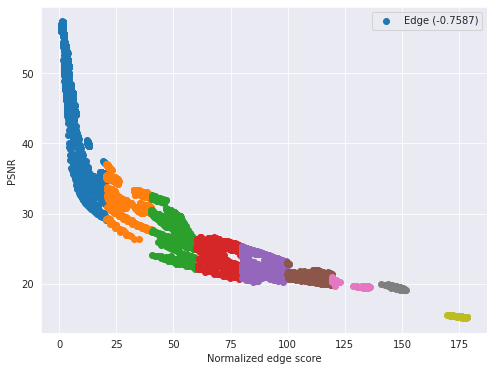

In [28]:
plt.figure(figsize=(8, 6))

for pair in pairs:
    x, y = pair
    # sns.scatter(x='edge_3', y='psnr_3', data=corr_df)
    plt.scatter(x=x, y=y)
plt.ylabel('PSNR')
plt.xlabel('Normalized edge score')
plt.legend(loc='upper right', labels=)
plt.show()

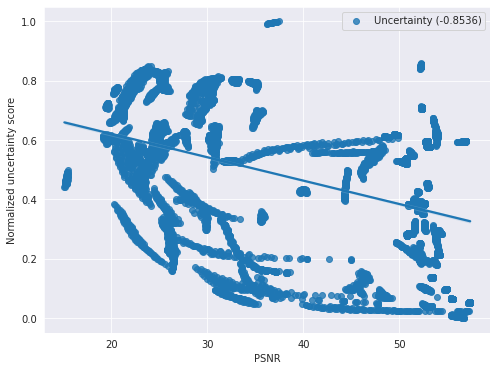

In [13]:
plt.figure(figsize=(8, 6))
sns.regplot(x='psnr_3', y='unc_3', data=corr_df)
plt.xlabel('PSNR')
plt.ylabel('Normalized uncertainty score')
plt.legend(loc='upper right', labels=['Uncertainty (-0.8536)'])
plt.show()